In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.shape

(1460, 81)

In [4]:
test = pd.read_csv("test.csv")

In [5]:
test.shape

(1459, 80)

### First Submission

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train.PoolArea.unique()

array([  0, 512, 648, 576, 555, 480, 519, 738])

In [8]:
rf = RandomForestRegressor()

In [9]:
rf.fit(X=train[['LotArea','PoolArea']],y=train['SalePrice'])

RandomForestRegressor()

In [10]:
test['SalePrice'] = rf.predict(test[['LotArea','PoolArea']])

In [11]:
test[['Id','SalePrice']].to_csv('first_kaggle_submission.csv', index=False)

#### EDA statistics

In [12]:
print('Train Shape', train.shape)
print('Test Shape', test.shape)

Train Shape (1460, 81)
Test Shape (1459, 81)


In [13]:
print(train['1stFlrSF'].head())

0     856
1    1262
2     920
3     961
4    1145
Name: 1stFlrSF, dtype: int64


#### Feature Engineering

In [14]:
train['TotalArea'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['TotalBsmtSF']

In [15]:
train['GardenArea'] = train['LotArea'] - train['1stFlrSF']

In [16]:
train['TotalBath'] = train['FullBath'] + train['HalfBath']

In [17]:
test['TotalArea'] = test['1stFlrSF'] + test['2ndFlrSF'] + test['TotalBsmtSF']

In [18]:
test['GardenArea'] = test['LotArea'] - test['1stFlrSF']

In [19]:
test['TotalBath'] = test['FullBath'] + test['HalfBath']

#### One Hote Encodig

In [20]:
train['Type'] = 'train'

In [21]:
test['Type'] = 'test'

In [22]:
houses = pd.concat([train,test])

In [23]:
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Categorical Variable Analyzis

In [24]:
houses['OpenPorchSF'].isna().sum()

0

In [25]:
houses['OpenPorchSF'].unique()

array([ 61,   0,  42,  35,  84,  30,  57, 204,   4,  21,  33, 213, 112,
       102, 154, 159, 110,  90,  56,  32,  50, 258,  54,  65,  38,  47,
        64,  52, 138, 104,  82,  43, 146,  75,  72,  70,  49,  11,  36,
       151,  29,  94, 101, 199,  99, 234, 162,  63,  68,  46,  45, 122,
       184, 120,  20,  24, 130, 205, 108,  80,  66,  48,  25,  96, 111,
       106,  40, 114,   8, 136, 132,  62, 228,  60, 238, 260,  27,  74,
        16, 198,  26,  83,  34,  55,  22,  98, 172, 119, 208, 105, 140,
       168,  28,  39, 148,  12,  51, 150, 117, 250,  10,  81,  44, 144,
       175, 195, 128,  76,  17,  59, 214, 121,  53, 231, 134, 192, 123,
        78, 187,  85, 133, 176, 113, 137, 125, 523, 100, 285,  88, 406,
       155,  73, 182, 502, 274, 158, 142, 243, 235, 312, 124, 267, 265,
        87, 288,  23, 152, 341, 116, 160, 174, 247, 291,  18, 170, 156,
       166, 129, 418, 240,  77, 364, 188, 207,  67,  69, 131, 191,  41,
       118, 252, 189, 282, 135,  95, 224, 169, 319,  58,  93, 24

#### One Hot Encoding

In [26]:
houses.shape

(2919, 85)

In [27]:
ohe = pd.get_dummies(houses['LotShape'], prefix='LotShape')
houses = pd.concat([houses,ohe], axis=1)

In [28]:
houses.drop('LotShape', axis=1, inplace=True)

In [29]:
ohe = pd.get_dummies(houses['LandContour'], prefix='LandContour')
houses = pd.concat([houses,ohe], axis=1)

In [30]:
houses.drop('LandContour', axis=1, inplace=True)

In [31]:
ohe = pd.get_dummies(houses['LotConfig'], prefix='LotConfig')
houses = pd.concat([houses,ohe], axis=1)

In [32]:
houses.drop('LotConfig', axis=1, inplace=True)

In [33]:
ohe = pd.get_dummies(houses['LandSlope'], prefix='LandSlope')
houses = pd.concat([houses,ohe], axis=1)

In [34]:
houses.drop('LandSlope', axis=1, inplace=True)

In [35]:
ohe = pd.get_dummies(houses['Neighborhood'], prefix='Neighborhood')
houses = pd.concat([houses,ohe], axis=1)

In [36]:
houses.drop('Neighborhood', axis=1, inplace=True)

In [37]:
ohe = pd.get_dummies(houses['Condition1'], prefix='Condition1')
houses = pd.concat([houses,ohe], axis=1)

In [38]:
houses.drop('Condition1', axis=1, inplace=True)

In [39]:
ohe = pd.get_dummies(houses['Condition2'], prefix='Condition2')
houses = pd.concat([houses,ohe], axis=1)

In [40]:
houses.drop('Condition2', axis=1, inplace=True)

In [41]:
ohe = pd.get_dummies(houses['BldgType'], prefix='BldgType')
houses = pd.concat([houses,ohe], axis=1)

In [42]:
houses.drop('BldgType', axis=1, inplace=True)

In [43]:
ohe = pd.get_dummies(houses['HouseStyle'], prefix='HouseStyle')
houses = pd.concat([houses,ohe], axis=1)

In [44]:
houses.drop('HouseStyle', axis=1, inplace=True)

In [45]:
ohe = pd.get_dummies(houses['RoofStyle'], prefix='RoofStyle')
houses = pd.concat([houses,ohe], axis=1)

In [46]:
houses.drop('RoofStyle', axis=1, inplace=True)

In [47]:
ohe = pd.get_dummies(houses['RoofMatl'], prefix='RoofMatl')
houses = pd.concat([houses,ohe], axis=1)

In [48]:
houses.drop('RoofMatl', axis=1, inplace=True)

In [49]:
ohe = pd.get_dummies(houses['Foundation'], prefix='Foundation')
houses = pd.concat([houses,ohe], axis=1)

In [50]:
houses.drop('Foundation', axis=1, inplace=True)

In [51]:
ohe = pd.get_dummies(houses['Heating'], prefix='Heating')
houses = pd.concat([houses,ohe], axis=1)

In [52]:
houses.drop('Heating', axis=1, inplace=True)

In [53]:
ohe = pd.get_dummies(houses['PavedDrive'], prefix='PavedDrive')
houses = pd.concat([houses,ohe], axis=1)

In [54]:
houses.drop('PavedDrive', axis=1, inplace=True)

In [ ]:
# include LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF

#### Graphics for analyzis

In [153]:
import matplotlib.pyplot as plt

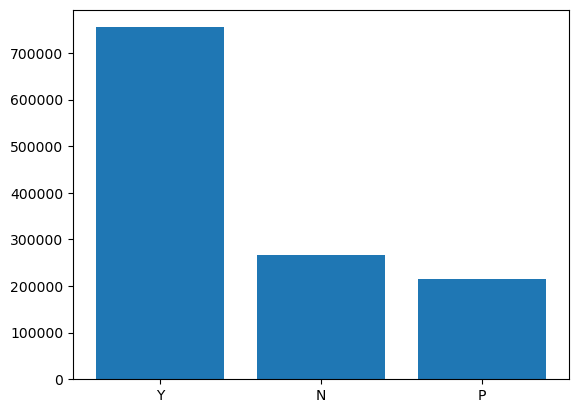

In [156]:
plt.bar(train['PavedDrive'], train['SalePrice'])
plt.show()

#### Label Encoding

In [55]:
le = LabelEncoder()
houses['CentralAir'] = le.fit_transform(houses['CentralAir'])
houses['CentralAir'].unique()

array([1, 0])

In [56]:
le = LabelEncoder()
houses['Street'] = le.fit_transform(houses['Street'])
houses['Street'].unique()

array([1, 0])

In [57]:
mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1}

In [58]:
houses['ExterQual'] = houses['ExterQual'].replace(mapping)

In [59]:
houses['ExterCond'] = houses['ExterCond'].replace(mapping)

In [60]:
houses['HeatingQC'] = houses['HeatingQC'].replace(mapping)

#### Convert Dates

In [116]:
#houses['GarageYrBlt'] = pd.to_datetime(houses['GarageYrBlt'], format='%Y', errors='coerce')

In [117]:
#houses['GarageYrBlt'].head()

0   2003-01-01
1   1976-01-01
2   2001-01-01
3   1998-01-01
4   2000-01-01
Name: GarageYrBlt, dtype: datetime64[ns]

In [119]:
#houses['GarageYrBlt'].isna().sum()

159

#### Select Columns

In [66]:
correct_columns = ['Street','TotalArea','GardenArea','TotalBath','LowQualFinSF','GrLivArea','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF']

In [67]:
columns = []

In [68]:
columns += correct_columns

In [69]:
columns

['Street',
 'TotalArea',
 'GardenArea',
 'TotalBath',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [70]:
x = ([col for col in houses.columns if 'LotShape' in col])
columns += x

In [71]:
x = ([col for col in houses.columns if 'LandContour' in col])
columns += x

In [72]:
x = ([col for col in houses.columns if 'LotConfig' in col])
columns += x

In [73]:
x = ([col for col in houses.columns if 'LandSlope' in col])
columns += x

In [74]:
x = ([col for col in houses.columns if 'Neighborhood' in col])
columns += x

In [75]:
x = ([col for col in houses.columns if 'Condition1' in col])
columns += x

In [76]:
x = ([col for col in houses.columns if 'Condition2' in col])
columns += x

In [77]:
x = ([col for col in houses.columns if 'BldgType' in col])
columns += x

In [78]:
x = ([col for col in houses.columns if 'HouseStyle' in col])
columns += x

In [79]:
x = ([col for col in houses.columns if 'RoofStyle' in col])
columns += x

In [80]:
x = ([col for col in houses.columns if 'RoofMatl' in col])
columns += x

In [81]:
x = ([col for col in houses.columns if 'Foundation' in col])
columns += x

In [82]:
x = ([col for col in houses.columns if 'Heating' in col])
columns += x

In [83]:
x = ([col for col in houses.columns if 'PavedDrive' in col])
columns += x

In [84]:
columns

['Street',
 'TotalArea',
 'GardenArea',
 'TotalBath',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighbo

#### Split train and test

In [85]:
train = houses[houses['Type']=='train']

In [86]:
test = houses[houses['Type']=='test']

#### Filter Columns

In [87]:
# Filter columns with more than one missing value
selected_columns = train[columns].columns[train[columns].isna().sum() == 1]
print(selected_columns)

Index([], dtype='object')


In [88]:
# Filter columns with more than one missing value
selected_columns = test[columns].columns[test[columns].isna().sum() == 1]
print(selected_columns)

Index(['TotalArea', 'GarageArea'], dtype='object')


In [93]:
test['TotalArea'].isna().sum()

0

In [94]:
test['GarageArea'].isna().sum()

0

In [91]:
average_total_area = test['TotalArea'].mean()
test['TotalArea'].fillna(average_total_area, inplace=True)

/var/folders/sq/dl_vqf5n05z5z05q_14d_wmw0000gn/T/ipykernel_62301/3434746067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['TotalArea'].fillna(average_total_area, inplace=True)


In [92]:
average_total_area = test['GarageArea'].mean()
test['GarageArea'].fillna(average_total_area, inplace=True)

/var/folders/sq/dl_vqf5n05z5z05q_14d_wmw0000gn/T/ipykernel_62301/2045763681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['GarageArea'].fillna(average_total_area, inplace=True)


#### Apply the model 

In [95]:
rf_2 = RandomForestRegressor()

In [96]:
rf_2.fit(X=train[columns],y=train['SalePrice'])

RandomForestRegressor()

In [97]:
test['SalePrice'] = rf_2.predict(test[columns])

/var/folders/sq/dl_vqf5n05z5z05q_14d_wmw0000gn/T/ipykernel_62301/3444888542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SalePrice'] = rf_2.predict(test[columns])


#### Validate name before

In [100]:
test[['Id','SalePrice']].to_csv('third_kaggle_submission.csv', index=False)